# Loading Dataset and TF-IDF based clustering


🔹 Cluster 0:
Lack of Assurance of Sterility; Drug product le...
Subpotent Drug: Low out-of-specification assay ...
                                  Superpotent Drug
Presence of Foreign substance: identified as a ...
Firm is recalling 46 lots of various products b...

🔹 Cluster 1:
Lack of Assurance of Sterility
Lack of Assurance of Sterility
Lack of Assurance of Sterility
Lack of Assurance of Sterility
Lack of Assurance of Sterility

🔹 Cluster 2:
     Labeling: Label Mixup; potentially mislabeled
Labeling:Label Mixup; CINACALCET HCL Tablet, 60...
Labeling:Label Mixup; MAGNESIUM CHLORIDE, Table...
Labeling: Label Mixup; WARFARIN SODIUM, Tablet,...
Labeling: Label Mixup;  PHYTONADIONE Tablet, 5 ...

🔹 Cluster 3:
 Microbial Contamination of Non-Sterile Products
Microbial contamination of non-sterile products.
 Microbial Contamination of Non-Sterile Products
  Microbial Contamination of Non-sterile Product
 Microbial Contamination of Non-Sterile Products

🔹 Cluster 4:
CGMP Deviations: Pro

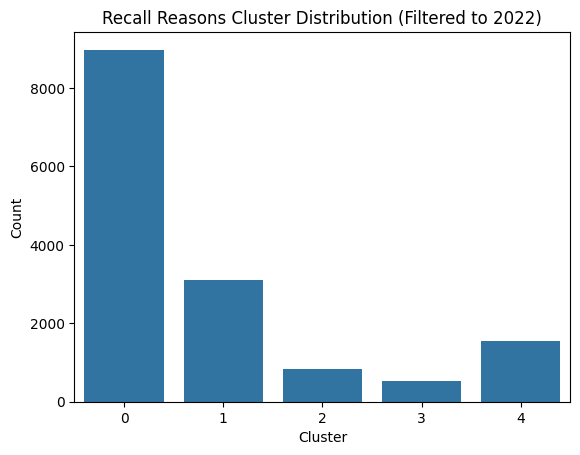

In [ ]:
#Installing the dependencies
!pip install pandas scikit-learn matplotlib seaborn openpyxl

#Importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Excel file (drug-enforcement)
df = pd.read_excel('/content/drug-enforcement4.xlsx', engine='openpyxl')

#Filtering the  records where recall_initiation_date is up to 2022
df['recall_initiation_date'] = pd.to_numeric(df['recall_initiation_date'], errors='coerce')
df = df[df['recall_initiation_date'] <= 20221231]

#Droping rows with missing reasons
df = df[df['reason_for_recall'].notnull()]
reasons = df['reason_for_recall'].astype(str)

#Applying TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(reasons)

#Applying the KMeans clustering
num_clusters = 5  # You can change this as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

#Assigning clusters to dataframe
df['recall_cluster'] = kmeans.labels_

#Print sample reasons from each cluster
for i in range(num_clusters):
    print(f"\n🔹 Cluster {i}:")
    print(df[df['recall_cluster'] == i]['reason_for_recall'].head(5).to_string(index=False))

#Visualize the distribution of clusters
sns.countplot(x='recall_cluster', data=df)
plt.title('Recall Reasons Cluster Distribution (Filtered to 2022)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


# Recall Trends (2011-2022)


🔎 Top TF-IDF Keywords per Year:
            2011       2012         2013           2014         2015  \
0        product    sterile    sterility      sterility    sterility   
1  specification         21  potentially     penicillin    assurance   
2        results   products    assurance       products         lack   
3          assay   presence         lack  contamination      product   
4       labeling  sterility           mg             12      quality   
5        tablets       lack       tablet          cross  potentially   
6          label  assurance          exp     repackaged          fda   
7        labeled     recall          ndc       recalled   inspection   
8             mg        fda     pedigree           lots   identified   
9        contain      drugs         2014      potential          gmp   

             2016        2017           2018           2019           2020  \
0            lack   sterility  contamination           lack     deviations   
1       sterility 

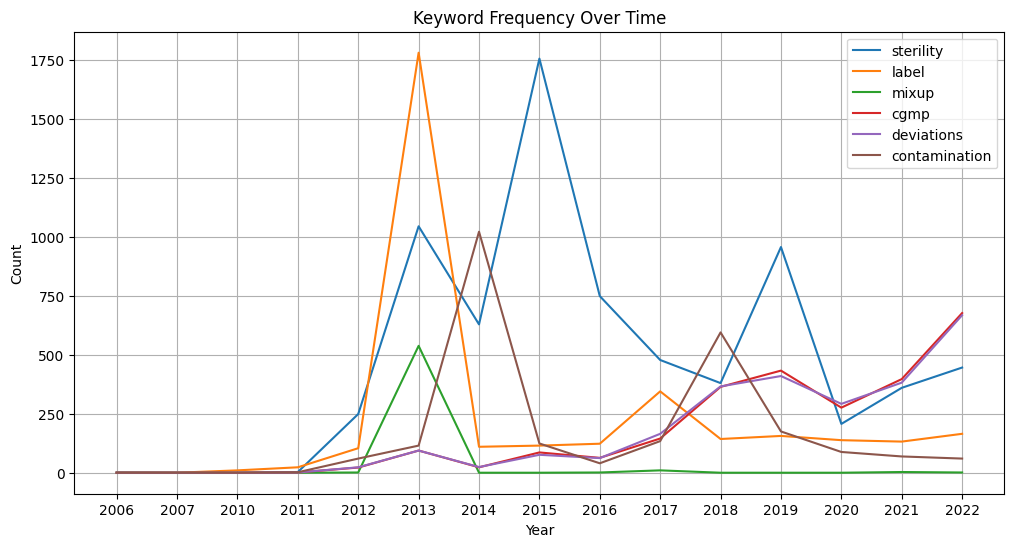

In [ ]:
#Install dependencies
!pip install pandas matplotlib seaborn scikit-learn openpyxl

#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

#Load Excel file
df = pd.read_excel('/content/drug-enforcement4.xlsx', engine='openpyxl')

#Clean and filter data
df['recall_initiation_date'] = pd.to_numeric(df['recall_initiation_date'], errors='coerce')
df = df[df['recall_initiation_date'].notnull()]
df = df[df['recall_initiation_date'] <= 20221231]
df['year'] = df['recall_initiation_date'].astype(str).str[:4]
df = df[df['reason_for_recall'].notnull()]
df['reason_for_recall'] = df['reason_for_recall'].astype(str)

# Define years to analyze
years = sorted(df['year'].unique())

#Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)

#Extract top keywords by year
year_keywords = {}
for year in years:
    reasons = df[df['year'] == year]['reason_for_recall']
    if len(reasons) >= 5:  # skip sparse years
        tfidf_matrix = vectorizer.fit_transform(reasons)
        feature_names = vectorizer.get_feature_names_out()
        scores = tfidf_matrix.sum(axis=0).A1
        keywords = dict(zip(feature_names, scores))
        sorted_keywords = dict(sorted(keywords.items(), key=lambda item: item[1], reverse=True))
        year_keywords[year] = list(sorted_keywords.keys())

#Convert to DataFrame for visualization
keyword_df = pd.DataFrame.from_dict(year_keywords, orient='index').transpose()
keyword_df.fillna('', inplace=True)

#Display top keywords over years
print("\n🔎 Top TF-IDF Keywords per Year:")
print(keyword_df)

# Build frequency table
top_terms = ['sterility', 'label', 'mixup', 'cgmp', 'deviations', 'contamination']
freq_over_time = {term: [] for term in top_terms}

for year in years:
    yearly_reasons = " ".join(df[df['year'] == year]['reason_for_recall'].astype(str)).lower()
    for term in top_terms:
        freq = yearly_reasons.count(term)
        freq_over_time[term].append(freq)

# Plot
plt.figure(figsize=(12, 6))
for term, counts in freq_over_time.items():
    plt.plot(years, counts, label=term)
plt.title('Keyword Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load the drug recall Excel file
recalls_df = pd.read_excel('/content/drug-enforcement4.xlsx', engine='openpyxl')

#Convert recall date to numeric and filter till 2022
recalls_df['recall_initiation_date'] = pd.to_numeric(recalls_df['recall_initiation_date'], errors='coerce')
recalls_df = recalls_df[recalls_df['recall_initiation_date'] <= 20221231]

#Convert to datetime format
recalls_df['recall_initiation_date'] = pd.to_datetime(recalls_df['recall_initiation_date'].astype(str), format='%Y%m%d', errors='coerce')

#Extract generic name from product description
recalls_df = recalls_df[['recall_initiation_date', 'product_description']].copy()
recalls_df['gnrc_name'] = recalls_df['product_description'].str.extract(r'^(.*?)[,;:]')

#Drop missing values
recalls_df.dropna(subset=['recall_initiation_date', 'gnrc_name'], inplace=True)

#Final preview
recalls_df = recalls_df.reset_index(drop=True)
print(recalls_df.head())


  recall_initiation_date                                product_description  \
0             2013-11-12  10%, Travasol (Amino Acid) Injection, 2000 ml,...   
1             2020-12-10  Sensorcaine-MPF (Bupivacaine HCl and Epinephri...   
2             2021-03-26  Cefprozil for Oral Suspension USP, 250mg/5mL, ...   
3             2019-11-01  Cefdinir for Oral Suspension USP, 125 mg/5mL, ...   
4             2020-03-16  rocuronium Bromide 10 mg per mL 50 mg per 5 mL...   

                                           gnrc_name  
0                                                10%  
1  Sensorcaine-MPF (Bupivacaine HCl and Epinephri...  
2                  Cefprozil for Oral Suspension USP  
3                   Cefdinir for Oral Suspension USP  
4     rocuronium Bromide 10 mg per mL 50 mg per 5 mL  


# Recall Extraction

In [ ]:
import pandas as pd

# Load the Excel file
recalls_df = pd.read_excel('/content/drug-enforcement4.xlsx', engine='openpyxl')

#Convert recall_initiation_date to numeric
recalls_df['recall_initiation_date'] = pd.to_numeric(recalls_df['recall_initiation_date'], errors='coerce')

#Filter dates between 2018 and 2022
recalls_df = recalls_df[
    (recalls_df['recall_initiation_date'] >= 20180101) &
    (recalls_df['recall_initiation_date'] <= 20221231)
]

#Convert to datetime format
recalls_df['recall_initiation_date'] = pd.to_datetime(recalls_df['recall_initiation_date'].astype(str), format='%Y%m%d', errors='coerce')

#Extract generic drug name from product_description
recalls_df = recalls_df[['recall_initiation_date', 'product_description']].copy()
recalls_df['gnrc_name'] = recalls_df['product_description'].str.extract(r'^(.*?)[,;:]')

#Drop rows with missing values
recalls_df.dropna(subset=['recall_initiation_date', 'gnrc_name'], inplace=True)

# Final preview
recalls_df = recalls_df.reset_index(drop=True)
print(recalls_df.head())


  recall_initiation_date                                product_description  \
0             2020-12-10  Sensorcaine-MPF (Bupivacaine HCl and Epinephri...   
1             2021-03-26  Cefprozil for Oral Suspension USP, 250mg/5mL, ...   
2             2019-11-01  Cefdinir for Oral Suspension USP, 125 mg/5mL, ...   
3             2020-03-16  rocuronium Bromide 10 mg per mL 50 mg per 5 mL...   
4             2021-04-29  Cefixime for Oral Suspension USP 100 mg/5mL, 5...   

                                           gnrc_name  
0  Sensorcaine-MPF (Bupivacaine HCl and Epinephri...  
1                  Cefprozil for Oral Suspension USP  
2                   Cefdinir for Oral Suspension USP  
3     rocuronium Bromide 10 mg per mL 50 mg per 5 mL  
4        Cefixime for Oral Suspension USP 100 mg/5mL  


# Drug Recalls per year

<ipython-input-6-6dce8535cec0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recall_counts.index, y=recall_counts.values, palette='viridis')


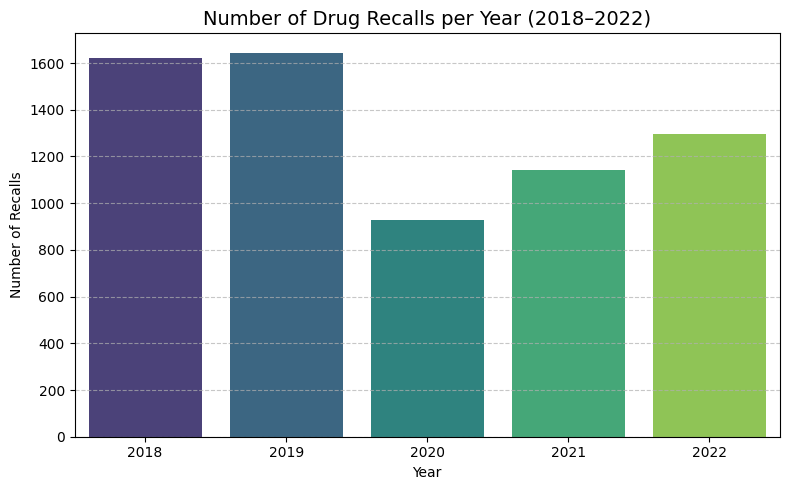

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'year' column
recalls_df['year'] = recalls_df['recall_initiation_date'].dt.year

# Count recalls per year
recall_counts = recalls_df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=recall_counts.index, y=recall_counts.values, palette='viridis')

plt.title('Number of Drug Recalls per Year (2018–2022)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
recall_counts = recalls_df['year'].value_counts().sort_index()
print("Number of recalls by year (2018–2022):")
print(recall_counts)


Number of recalls by year (2018–2022):
year
2018    1620
2019    1645
2020     928
2021    1144
2022    1297
Name: count, dtype: int64


In [ ]:
# Get unique generic drug names
unique_drugs = recalls_df['gnrc_name'].dropna().unique()

# Sort and display
unique_drugs = sorted(unique_drugs)
print(f"Total unique drug names recalled (2018–2022): {len(unique_drugs)}\n")
print(unique_drugs)


Total unique drug names recalled (2018–2022): 5378

['(CA) GONADORELIN (4ML) 0.2 MG/ML INJECTABLE', '(Malin + Goetz) Salicylic Gel (2% Salicylic Acid) 0.5 fl.oz. 15 mL tube', '(Malin + Goetz) dandruff Shampoo Psoriasis and Sebborrheic Dermatitis (1.9% Pyrithione Zinc) 8 fl.oz bottle', '(Malin+Goetz) spf 30 face moisturizer (Avobenzone 3%', "(WELL'S LIPO-LEAN)INOSITOL/CHOLINE/B-COMP+LEUCINE+CARN+ CHROM+LIDO  25MG/25MG/1.5MG/25MG/25MCG/10MG INJECTABLE in vials", '*Mitomycin 0.04% Ophth DR eye drops', '*Morphine 2 mg/mL Cassette', '+Protec Hands Antibacterial Gel Topical Solution Instant Sanitizer Hands 70% Alcohol Antiseptic', '0.125% Bupivacaine HCl Injection', '0.2% ROPivacaine', '0.2% ROPivacaine - OnQ Pump', '0.2% Ropivacaine HCI (Preservative Free) in 0.9 Sodium Chloride', '0.45% Sodium Chloride Injection', '0.5% Bupivacaine Hydrochloride Injection', '0.9%  Sodium Chloride', '0.9% Buffered Lidocaine HCl (buffered in 8.4% Sodium Bicarbonate)', '0.9% Buffered Lidocaine HCl (buffered i

# No of Recalls

In [ ]:
# Count the number of recalls per generic drug name
drug_counts = recalls_df['gnrc_name'].value_counts().reset_index()
drug_counts.columns = ['Drug Name', 'Number of Recalls']

# Sort alphabetically (optional)
drug_counts = drug_counts.sort_values(by='Drug Name').reset_index(drop=True)

# Display as table
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

# Show first 20 rows
drug_counts.head(20)


,Drug Name,Number of Recalls
0,(CA) GONADORELIN (4ML) 0.2 MG/ML INJECTABLE,1
1,(Malin + Goetz) Salicylic Gel (2% Salicylic Ac...,1
2,(Malin + Goetz) dandruff Shampoo Psoriasis and...,1
3,(Malin+Goetz) spf 30 face moisturizer (Avobenz...,1
4,(WELL'S LIPO-LEAN)INOSITOL/CHOLINE/B-COMP+LEUC...,1
5,*Mitomycin 0.04% Ophth DR eye drops,1
6,*Morphine 2 mg/mL Cassette,1
7,+Protec Hands Antibacterial Gel Topical Soluti...,1
8,0.125% Bupivacaine HCl Injection,1
9,0.2% ROPivacaine,1


In [ ]:
import pandas as pd
from datetime import timedelta

#Extract recall month
recalls_df['recall_month'] = recalls_df['recall_initiation_date'].dt.to_period('M').astype(str)

#Add ±30 day window
recalls_df['date_before'] = recalls_df['recall_initiation_date'] - timedelta(days=30)
recalls_df['date_after'] = recalls_df['recall_initiation_date'] + timedelta(days=30)

#Final preview
recalls_df[['recall_initiation_date', 'recall_month', 'date_before', 'date_after', 'gnrc_name']].head()


,recall_initiation_date,recall_month,date_before,date_after,gnrc_name
0,2020-12-10,2020-12,2020-11-10,2021-01-09,Sensorcaine-MPF (Bupivacaine HCl and Epinephri...
1,2021-03-26,2021-03,2021-02-24,2021-04-25,Cefprozil for Oral Suspension USP
2,2019-11-01,2019-11,2019-10-02,2019-12-01,Cefdinir for Oral Suspension USP
3,2020-03-16,2020-03,2020-02-15,2020-04-15,rocuronium Bromide 10 mg per mL 50 mg per 5 mL
4,2021-04-29,2021-04,2021-03-30,2021-05-29,Cefixime for Oral Suspension USP 100 mg/5mL


# Common Drug

In [ ]:
# Drug names from the image
image_drugs = [
    "(CA) GONADORELIN (4ML) 0.2 MG/ML INJECTABLE",
    "(Malin + Goetz) Salicylic Gel (2% Salicylic Ac...",
    "(Malin + Goetz) dandruff Shampoo Psoriasis and...",
    "(Malin+Goetz) spf 30 face moisturizer (Avobenz...",
    "(WELL'S LIPO-LEAN)INOSITOL/CHOLINE/B-COMP+LEUC...",
    "*Mitomycin 0.04% Ophth DR eye drops",
    "*Morphine 2 mg/mL Cassette",
    "+Protec Hands Antibacterial Gel Topical Soluti...",
    "0.125% Bupivacaine HCl Injection",
    "0.2% ROPivacaine",
    "0.2% ROPivacaine - OnQ Pump",
    "0.2% Ropivacaine HCl (Preservative Free) in 0....",
    "0.45% Sodium Chloride Injection",
    "0.5% Bupivacaine Hydrochloride Injection",
    "0.9% Sodium Chloride",
    "0.9% Buffered Lidocaine HCl (buffered in 8.4% ...",
    "0.9% Buffered Lidocaine HCl (buffered in 8.4% ...",
    "0.9% SODIUM CHLORIDE INJECTION",
    "0.9% SODIUM CHLORIDE Irrigation",
    "0.9% Sodium Chloride Injection"
]

# Drug names from the pasted text
text_drugs = ['olanzapine', 'fluconazole', 'gabapentin', 'azithromycin', 'clozapine',
 'amlodipine besylate', 'hydroxychloroquine sulfate', 'dutasteride',
 'ritonavir', 'albuterol sulfate', 'sumatriptan succinate',
 'rivastigmine tartrate', 'nifedipine', 'amoxicillin', 'hydroxyurea',
 'escitalopram oxalate', 'estradiol', 'methimazole', 'fluorouracil',
 'omeprazole', 'carbamazepine', 'amphetamine sulfate', 'adefovir dipivoxil',
 'modafinil', 'glimepiride', 'dronabinol', 'lansoprazole',
 'cefpodoxime proxetil', 'trandolapril', 'captopril', 'mycophenolate mofetil',
 'paricalcitol', 'bisoprolol fumarate', 'ursodiol', 'gemfibrozil',
 'risperidone', 'anastrozole', 'disopyramide phosphate', 'imiquimod',
 'capecitabine', 'griseofulvin, microsize', 'divalproex sodium',
 'mirtazapine', 'pindolol', 'mercaptopurine', 'methotrexate sodium',
 'eszopiclone', 'atenolol', 'nateglinide', 'morphine sulfate', # <-- match expected
 'cilostazol', 'isosorbide mononitrate', 'abacavir sulfate', 'levetiracetam',
 'entacapone', 'eletriptan hydrobromide', 'clobetasol propionate', 'cabergoline',
 'naproxen sodium', 'methazolamide', 'tranylcypromine sulfate', 'tinidazole',
 'metronidazole', 'febuxostat', 'diflunisal', 'chlorhexidine gluconate',
 'nitroglycerin', 'ipratropium bromide', 'deferasirox',
 'diclofenac potassium', 'lacosamide', 'naproxen', 'lamotrigine',
 'olmesartan medoxomil', 'calcitriol', 'potassium citrate',
 'sildenafil citrate', 'repaglinide', 'acetazolamide', 'diclofenac sodium',
 'ketoconazole', 'norethindrone acetate', 'carbinoxamine maleate',
 'celecoxib', 'estazolam', 'atorvastatin calcium', 'nadolol',
 'pravastatin sodium', 'lithium carbonate', 'cefdinir', 'permethrin',
 'dofetilide', 'lamivudine', 'oxcarbazepine', 'citalopram hydrobromide',
 'tenofovir disoproxil fumarate', 'allopurinol', 'albendazole',
 'itraconazole', 'rufinamide', 'simvastatin', 'ramipril',
 'bethanechol chloride', 'acyclovir', 'exemestane', 'temazepam', 'furosemide',
 'nizatidine', 'ethosuximide', 'zaleplon', 'levocetirizine dihydrochloride',
 'ezetimibe', 'flecainide acetate', 'indapamide', 'imatinib mesylate',
 'glipizide', 'tranexamic acid', 'ciclopirox', 'bicalutamide', 'mesalamine',
 'clonidine', 'sodium polystyrene sulfonate', 'sirolimus', 'roflumilast',
 'glycopyrrolate', 'lisinopril', 'losartan potassium', 'irbesartan',
 'famotidine', 'azathioprine', 'alendronate sodium', 'aripiprazole',
 'alprazolam', 'famciclovir', 'desoximetasone', 'isotretinoin',
 'fluticasone propionate', 'tadalafil', 'cefprozil', 'triazolam',
 'enalapril maleate', 'eplerenone', 'rizatriptan benzoate', 'carvedilol',
 'clarithromycin', 'zidovudine', 'etodolac', 'potassium chloride',
 'risedronate sodium', 'pentoxifylline', 'fosinopril sodium',
 'zolpidem tartrate', 'levocarnitine', 'benzonatate',
 'betamethasone dipropionate', 'ramelteon', 'prednisolone sodium phosphate',
 'abiraterone acetate', 'megestrol acetate', 'pantoprazole sodium',
 'metoprolol succinate', 'fluocinolone acetonide', 'benztropine mesylate',
 'clopidogrel bisulfate', 'candesartan cilexetil', 'ibandronate sodium',
 'fluvoxamine maleate', 'spironolactone', 'cyclosporine',
 'atazanavir sulfate', 'solifenacin succinate', 'alclometasone dipropionate',
 'digoxin', 'sulfacetamide sodium', 'felbamate', 'torsemide', 'indomethacin',
 'silodosin', 'mefenamic acid', 'telmisartan', 'leucovorin calcium',
 'clindamycin phosphate', 'temozolomide', 'chlorzoxazone', 'everolimus',
 'carisoprodol', 'baclofen', 'ibuprofen', 'leflunomide', 'clonazepam',
 'zolmitriptan', 'tobramycin', 'glyburide', 'folic acid',
 'balsalazide disodium', 'doxycycline hyclate', 'diazepam',
 'bromocriptine mesylate', 'quinine sulfate', 'flutamide', 'cyclophosphamide',
 'cefuroxime axetil', 'pregabalin', 'ketorolac tromethamine', 'clobazam',
 'latanoprost', 'linezolid', 'levofloxacin', 'desmopressin acetate',
 'montelukast sodium', 'levothyroxine sodium', 'clorazepate dipotassium',
 'acitretin', 'frovatriptan succinate', 'dapsone', 'fenofibrate',
 'paroxetine mesylate', 'nimodipine', 'perphenazine', 'rosuvastatin calcium',
 'desloratadine', 'oxybutynin chloride', 'tacrolimus', 'entecavir',
 'lovastatin', 'isosorbide dinitrate', 'quetiapine fumarate', 'zonisamide',
 'felodipine', 'voriconazole', 'hydroxyzine pamoate', 'oxaprozin',
 'metaxalone', 'tolterodine tartrate', 'nevirapine', 'colchicine', 'rifabutin',
 'zafirlukast', 'dipyridamole', 'oseltamivir phosphate', 'cephalexin',
 'hydrocortisone', 'bumetanide', 'misoprostol', 'rasagiline mesylate',
 'sevelamer carbonate', 'letrozole', 'methscopolamine bromide', 'lorazepam',
 'hydrochlorothiazide', 'icosapent ethyl', 'aprepitant',
 'hydrocortisone valerate', 'etravirine', 'ondansetron', 'valsartan',
 'finasteride', 'doxazosin mesylate', 'topiramate', 'meloxicam', 'nabumetone',
 'fentanyl', 'acarbose', 'efavirenz', 'carbidopa', 'trospium chloride',
 'loxapine succinate', 'piroxicam', 'disulfiram', 'calcium acetate',
 'armodafinil', 'riluzole', 'calcipotriene', 'budesonide'
]

# Normalize both lists
def normalize(name):
    return name.lower().split()[0].strip('()*+.,')

normalized_image = set(normalize(drug) for drug in image_drugs)
normalized_text = set(normalize(drug) for drug in text_drugs)

# Find intersection
common = normalized_image & normalized_text
print("Common drug roots or names:", common)


Common drug roots or names: {'morphine'}


# Total spending of Morphine Sulphate

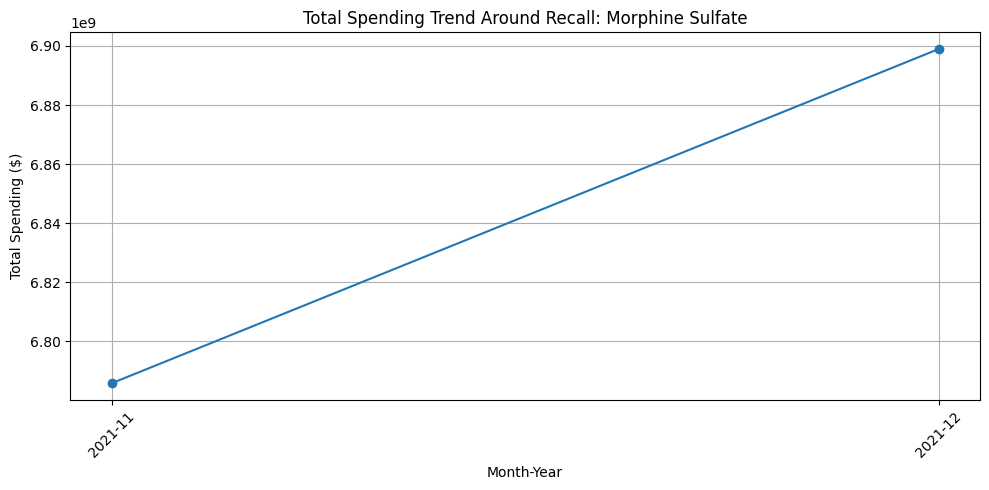

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Load AMP dataset
amp_df = pd.read_csv('/content/drug_amp_dataset.csv')

# Prepare AMP data
amp_df['month'] = amp_df['month'].astype(str).str.zfill(2)
amp_df['year'] = amp_df['year'].astype(str)
amp_df['month_year'] = amp_df['year'] + '-' + amp_df['month']
amp_df['gnrc_name'] = amp_df['gnrc_name'].str.lower()
amp_df['tot_spndng'] = pd.to_numeric(amp_df['tot_spndng'], errors='coerce')

#Make sure `recalls_df` is loaded and cleaned with date_before and date_after
recalls_df['gnrc_name'] = recalls_df['gnrc_name'].str.lower()

#Filter recall events for "morphine sulphate"
target_drug = "morphine sulfate"
morphine_recalls = recalls_df[recalls_df['gnrc_name'].str.contains(target_drug)]

#Use only the first recall instance for simplicity
if not morphine_recalls.empty:
    event = morphine_recalls.iloc[0]
    date_before = event['date_before']
    date_after = event['date_after']

    # Generate all months between date_before and date_after
    date_range = pd.date_range(date_before, date_after, freq='MS').to_period('M').astype(str)

    # Filter AMP data for the given months and drug
    amp_plot_data = amp_df[
        (amp_df['gnrc_name'].str.contains(target_drug)) &
        (amp_df['month_year'].isin(date_range))
    ].copy()

    # Sort and plot
    amp_plot_data = amp_plot_data.groupby('month_year')['tot_spndng'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    plt.plot(amp_plot_data['month_year'], amp_plot_data['tot_spndng'], marker='o', linestyle='-')
    plt.xticks(rotation=45)
    plt.title(f'Total Spending Trend Around Recall: {target_drug.title()}')
    plt.xlabel('Month-Year')
    plt.ylabel('Total Spending ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No recall records found for 'morphine sulphate'.")


In [ ]:
import pandas as pd

# Make sure 'recall_initiation_date' is in datetime format
recalls_df['recall_initiation_date'] = pd.to_datetime(recalls_df['recall_initiation_date'], errors='coerce')

# Extract year from recall date
recalls_df['year'] = recalls_df['recall_initiation_date'].dt.year

# Group by generic name and year, and count recalls
recalls_per_year = recalls_df.groupby(['gnrc_name', 'year']).size().reset_index(name='recall_count')

# Sort by year and recall count
recalls_per_year = recalls_per_year.sort_values(by=['year', 'recall_count'], ascending=[True, False])

# Display the result
recalls_per_year.head(20)  # Display top 20 rows


,gnrc_name,year,recall_count
2216,gaia kratom (mitragyna speciosa) powder,2018,24
5281,valsartan tablets,2018,18
294,amlodipine and valsartan tablets,2018,11
1568,dr. king's safecare rx allergies,2018,11
289,amlodipine,2018,9
2581,ibuprofen tablets,2018,8
5274,valsartan and hydrochlorothiazide tablets,2018,8
5287,valsartan tablets usp,2018,8
1089,cvs health,2018,7
1567,dr. king's safecare rx aller-detox,2018,6


In [ ]:
# Ensure consistent lowercase naming
recalls_df['gnrc_name'] = recalls_df['gnrc_name'].str.lower()

# Extract year if not already done
recalls_df['year'] = recalls_df['recall_initiation_date'].dt.year

# Filter for morphine sulfate
morphine_recalls = recalls_df[recalls_df['gnrc_name'].str.contains('morphine sulfate')]

# Group by year and count
morphine_counts = morphine_recalls.groupby('year').size().reset_index(name='recall_count')

# Display result
print("Recall Count for Morphine Sulfate by Year:")
print(morphine_counts)


Recall Count for Morphine Sulfate by Year:
   year  recall_count
0  2018             9
1  2019            17
2  2020             6
3  2021             5
4  2022             8


# Plots

<ipython-input-26-917b843b1c37>:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


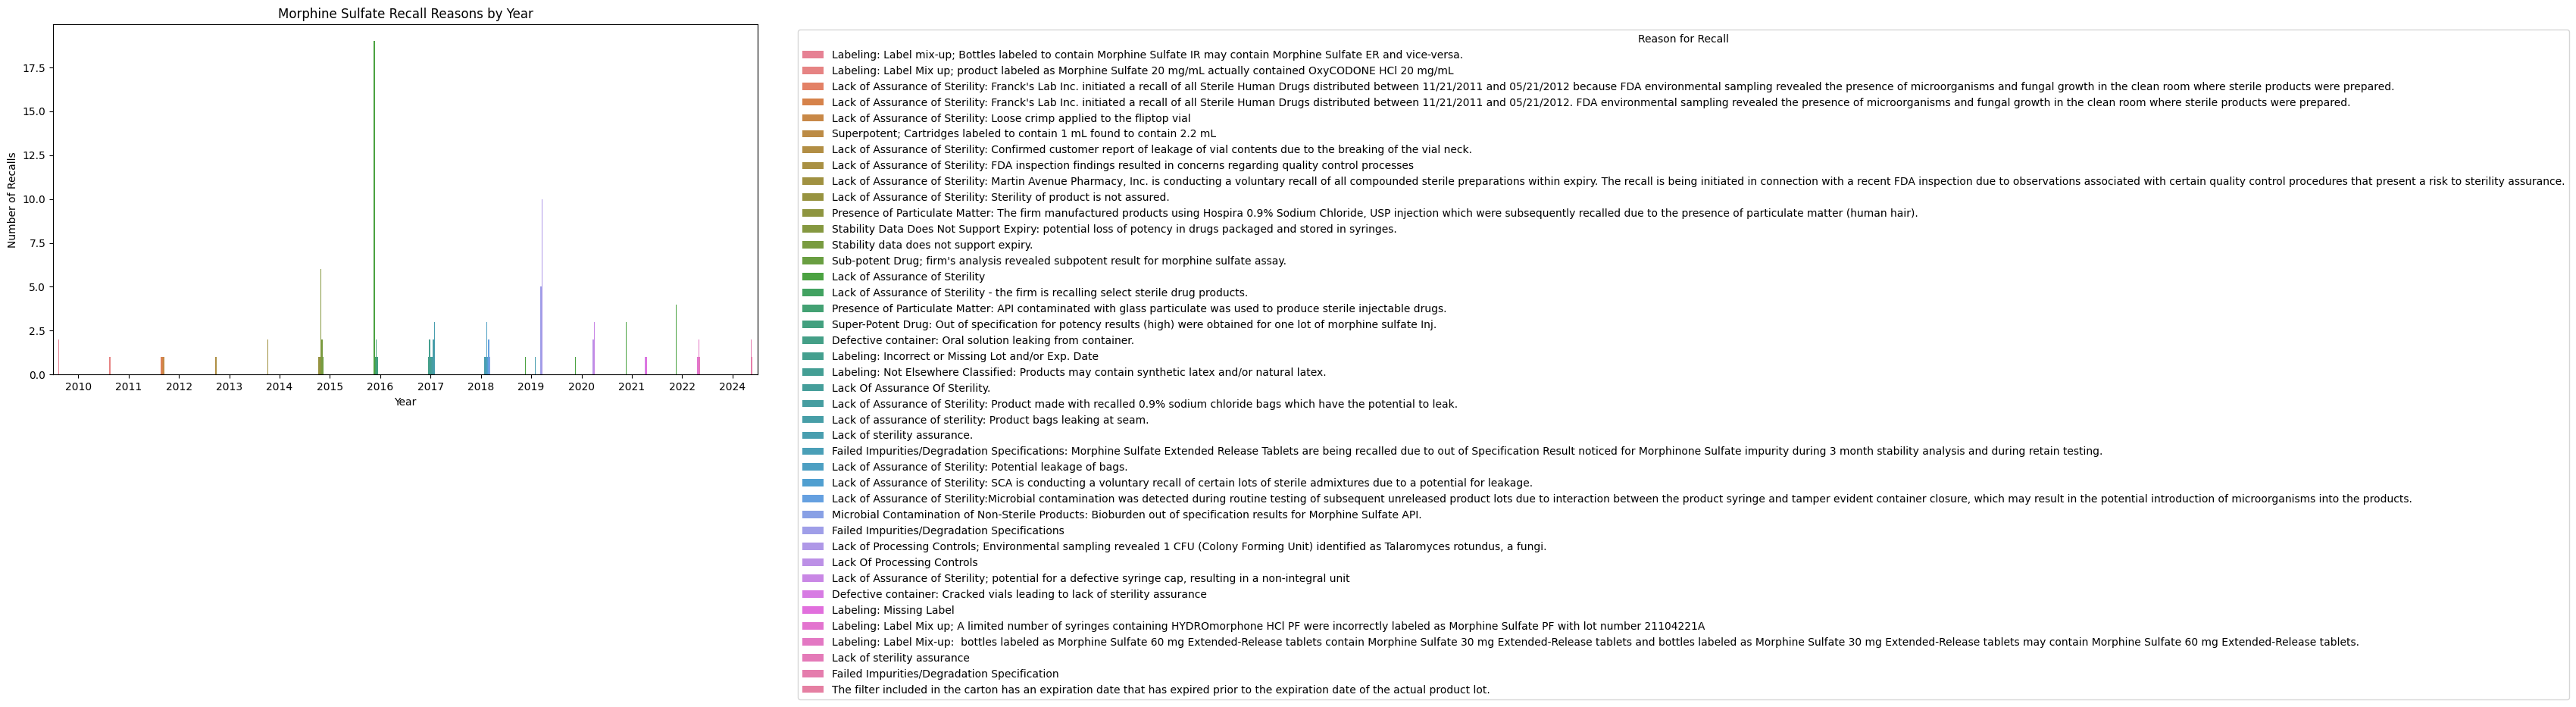

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the recall data
recalls_df = pd.read_excel('/content/drug-enforcement4.xlsx', engine='openpyxl')

# Standardize drug name
recalls_df['product_description'] = recalls_df['product_description'].astype(str).str.lower()
recalls_df['reason_for_recall'] = recalls_df['reason_for_recall'].astype(str)
recalls_df['recall_initiation_date'] = pd.to_numeric(recalls_df['recall_initiation_date'], errors='coerce')
recalls_df = recalls_df[recalls_df['recall_initiation_date'].notnull()]
recalls_df['recall_initiation_date'] = pd.to_datetime(recalls_df['recall_initiation_date'].astype(str), format='%Y%m%d', errors='coerce')
recalls_df['year'] = recalls_df['recall_initiation_date'].dt.year

# Filter for morphine sulfate
morphine_recalls = recalls_df[recalls_df['product_description'].str.contains('morphine sulfate')]

# Count by year and reason
reason_year_counts = morphine_recalls.groupby(['year', 'reason_for_recall']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=reason_year_counts, x='year', y='count', hue='reason_for_recall')
plt.title('Morphine Sulfate Recall Reasons by Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.legend(title='Reason for Recall', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-27-181b8f300515>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morphine_recalls['recall_category'] = morphine_recalls['reason_for_recall'].apply(categorize_reason)


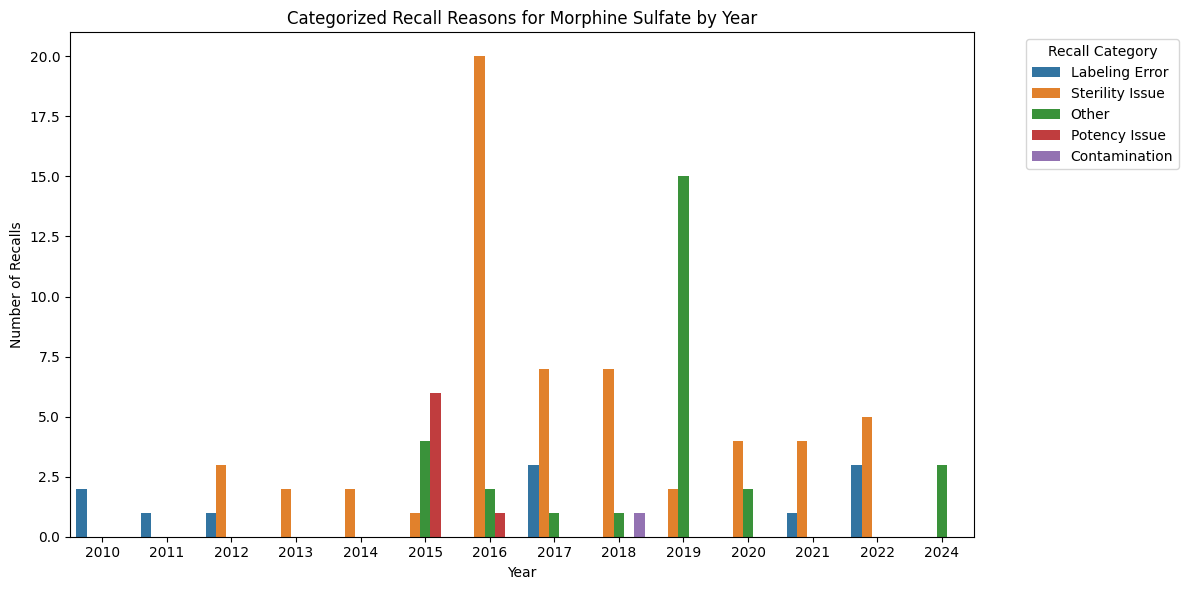

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean
recalls_df = pd.read_excel('/content/drug-enforcement4.xlsx', engine='openpyxl')
recalls_df['product_description'] = recalls_df['product_description'].astype(str).str.lower()
recalls_df['reason_for_recall'] = recalls_df['reason_for_recall'].astype(str).str.lower()
recalls_df['recall_initiation_date'] = pd.to_numeric(recalls_df['recall_initiation_date'], errors='coerce')
recalls_df = recalls_df[recalls_df['recall_initiation_date'].notnull()]
recalls_df['recall_initiation_date'] = pd.to_datetime(recalls_df['recall_initiation_date'].astype(str), format='%Y%m%d', errors='coerce')
recalls_df['year'] = recalls_df['recall_initiation_date'].dt.year

# Filter for morphine sulfate
morphine_recalls = recalls_df[recalls_df['product_description'].str.contains('morphine sulfate')]

# Categorize reason_for_recall
def categorize_reason(text):
    if 'sterility' in text:
        return 'Sterility Issue'
    elif 'contamination' in text or 'microbial' in text:
        return 'Contamination'
    elif 'label' in text or 'mislabeled' in text:
        return 'Labeling Error'
    elif 'potency' in text or 'strength' in text:
        return 'Potency Issue'
    elif 'storage' in text or 'temperature' in text:
        return 'Packaging/Storage'
    elif 'cgmp' in text or 'deviation' in text:
        return 'CGMP Deviation'
    else:
        return 'Other'

morphine_recalls['recall_category'] = morphine_recalls['reason_for_recall'].apply(categorize_reason)

# Count by year and category
category_counts = morphine_recalls.groupby(['year', 'recall_category']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts, x='year', y='count', hue='recall_category')
plt.title('Categorized Recall Reasons for Morphine Sulfate by Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.legend(title='Recall Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
